In [1]:
#some generic imports

%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
import pandas as pd
from scipy import stats
from scipy import special


### Calculas

##### Slope

For a differentiable function $f(x)$, slope at a point $a$ is given by $f'(a)$. The slope is zero at extrema (minima or maxima, global or local).

For example, consider a function $f(x) = x^2$. The derivative of this function ($f'(x)$) is given by $2x$. We can see that the derivative is zero at $x = 0$, which means function $f(x)$ has its extrema at $x = 0$

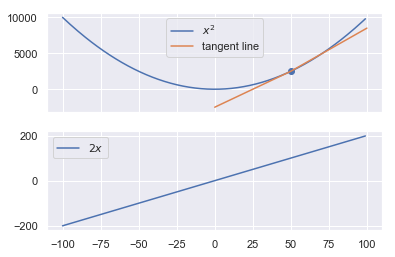

In [2]:
x = np.arange(-100,100)
 
fig, ax = plt.subplots(2, sharex = True)
ax[0].plot(x, (x**2), label = '$x^2$')
ax[0].plot([0,50,100],[-2500,2500,8500], label = 'tangent line')
ax[0].scatter(50, 2500)
ax[1].plot(x, (2*x), label = '$2x$')
ax[0].legend()
ax[1].legend()

### Vector

Vectors are 1-dimensional arrays of numbers or terms. In geometry, vectors store the magnitude and direction of a potential change to a point. A vector with more than one dimension is called a matrix.

##### Vector Scalar Operations

In [3]:
# a 3-d vector 
vec = np.array([2,3,5])
b = vec + 1
c = vec - 1
d = vec*2
e = vec/2
b,c,d,e

(array([3, 4, 6]),
 array([1, 2, 4]),
 array([ 4,  6, 10]),
 array([1. , 1.5, 2.5]))

##### Elementwise Operations

In [4]:
vec1 = np.array([2,2,3])

vec + vec1, vec - vec1, vec/vec1

(array([4, 5, 8]),
 array([0, 1, 2]),
 array([1.        , 1.5       , 1.66666667]))

##### Vector Dot Product and Hadamard Product

 - Vector Dot Product returns a scalar
 - Vector Hadamard Product returns another vector

In [5]:
#Dot Product
a = np.dot(vec, vec1)
c = vec@vec1
d = np.matmul(vec,vec1)

#Hadamard Product
b = np.multiply(vec, vec1)

a,b,c,d

(25, array([ 4,  6, 15]), 25, 25)

### Matrices

 - A rectangular grid of numbers
 - The dimension of matrix is decribed as rows x columns.
##### Matrix Multiplication or Dot Product

Inner dimension of both metrices should be same. That is, we can multiply two metrices of $A_{(l,m)}$ and $B_{(m,n)}$ . This will result into another matrix of the shape $(l,n)$

Matrix multiplication relies on dot product to multiply various combinations of rows and columns. In the image below, taken from Khan Academy’s excellent linear algebra course, each entry in Matrix C is the dot product of a row in matrix A and a column in matrix B.

![](images/dotprod.png)

In [6]:
import numpy as np
a = np.array([[1,2,3],[2,3,4]]) #2x3 matrix
b = np.array([1,3,4])     # can be broadcast to 3x1
c = np.array([4,2,1])
d = b[:,np.newaxis]
np.dot(a,b), np.dot(b,c)

(array([19, 27]), 14)

In [7]:
np.dot(a,d)

array([[19],
       [27]])

In [8]:
np.matmul(a,b), np.matmul(b,c), np.matmul(a,d)

(array([19, 27]), 14, array([[19],
        [27]]))

In [9]:
a@b #Python3.5+

array([19, 27])

Multiplication by a scalar is not allowed, use ``*`` instead. Note that multiplying a stack of matrices with a vector will result in a stack of vectors, but matmul will not recognize it as such.

``matmul`` differs from ``dot`` in two important ways.

- Multiplication by scalars is not allowed.
- Stacks of matrices are broadcast together as if the matrices
  were elements.
  
#### Hadamard Product or Element-wise Product  

In [10]:
a = np.array([[1,2],[3,4]])
b = np.array([[5,6],[7,8]])
np.multiply(a,b)

array([[ 5, 12],
       [21, 32]])

In [11]:
a*b

array([[ 5, 12],
       [21, 32]])

##### Matrix Transpose

Rows are converted columns.

In [12]:
a = np.array([[1,2],[3,4]])
a, a.T

(array([[1, 2],
        [3, 4]]), array([[1, 3],
        [2, 4]]))

##### Eigenvector and Eigenvalue

Let us assume that we have a matrix **A** and a vector *
v*.
We can get a vector *w* by taking their dot product - 

**A**.***v*** = ***w***

If it occurs that v and w are scalar multiples, that is if  -

**A**.***v*** = ***w*** = $\lambda$***v***

Then ***v*** is eigenvector of transformation **A** and $\lambda$ is eigenvalue corresponding to that eigenvector.

For example, let 

$A = \begin{bmatrix}
2 & 1 \\ 1 & 2
\end{bmatrix}
$

$v = \begin{bmatrix}1\\-1 \end{bmatrix}$

then their dot product (***w***) would be 

$w = \begin{bmatrix}1\\-1 \end{bmatrix}$

But it is immediately obvious that ***w*** is same as ***v***. Or put another way, ***w*** is scalar multiple of ***v*** as ***w*** = 1****v***. It follows that vector ***v*** is eigenvector and 1 is the eigenvalue for this vector. 

But this is not the only eigenvector/eigenvalue for this transformation. It is to be noted that the size of A determines the number of eighenvalues. For n x n matrix, the number of eigenvalues would be n.

From an stats.stackexchange post - 

*An n x n matrix which is diagonalizable must have a set of n linearly independent eigenvectors - the columns of the diagonalizing matrix are such a set. In general, if an n x n matrix has k distinct eigenvalues, then there may in general be anywhere between k and n linearly independent eigenvectors. For any of this, it doesn't matter whether or not the eighenvalues are non-zero.*

Another eigenvector (with eigenvalue = 3) would be -

$ v_{\lambda = 3}\begin{bmatrix}1\\1 \end{bmatrix}$

To calculate all possible values of $\lambda$, we calculate the determinant - 
 
$\begin{vmatrix}A-\lambda I \end{vmatrix}$

where $I$ is the identity matrix. 

For our example, we would have a determinant like this -

$\begin{vmatrix}
2-\lambda&1 \\
1& 2-\lambda
\end{vmatrix} = 3-4\lambda+\lambda^2$

the roots for quadratic equation on LHS are $\lambda$ = 1 and  $\lambda$ = 3. These two values would be our eigenvalues.
\


In [13]:
a = np.array([[2,1],[1,2]])
b = np.array([1,-1])
c = np.dot(a,b)
c

array([ 1, -1])

In [14]:
a

array([[2, 1],
       [1, 2]])

In [15]:
b*1 #is equal to c


array([ 1, -1])

In [16]:
b = np.array([1,1])
c = np.dot(a,b)
c

array([3, 3])

In [17]:
b*3 #b is another eigen vector and 3 eigen value. Same as c above


array([3, 3])

In [18]:
# scipy function to calculate eigenvectors and eigen values,

from scipy import linalg

linalg.eig(a)

(array([3.+0.j, 1.+0.j]), array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

Why isn't this function producing the eigenvector shown in the description?

Edit: Because `linalg.eig` produces normalized eigenvectors which in above case are `1/sqrt(2)` times the eigenvectors originally mentioned earlier. See below how normalization is done. 


In [19]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()
norm.fit_transform(np.array([[1,-1]]))

array([[ 0.70710678, -0.70710678]])

---
### Neural Network

##### Activation Functions

 - ELU
 - ReLU
 - Sigmoid
 - tanh
 - Softmax
 
##### Chain Rule for Derivatives

Suppose we have a function like -

𝑓(𝑥) = 𝐴(𝐵(𝐶(𝑥))

then, per chain rule, the derivative of 𝑓 wrt 𝑥 will be - 


𝑓′(𝑥) = 𝑓′(𝐴)·𝐴′(𝐵)·𝐵′(𝐶)·𝐶′(𝑥)

##### Architectures

 - Autoencoder
 - CNN
 - RNN
 - GNN
 - MLP
 - VAE

---
### Loss Function

 - Cross Entropy
 - Hinge Huber
 - Kullback-Leiber
 - MAE (L1)
 - MSE (L2)
 
### Optimzers

 - Adadelta
 - Adagrad
 - Adam
 - BFGS
 - SGD
 - Momentum
 - Newton's Method
 - RMSProp
 

##### Logistic or Sigmoid Function

If $y = \frac{1}{1 + exp(-x)}$ 

then $\frac{\partial y}{\partial x} = y(1 - y)$

Also this logistic function is the inverse of logit function $f(x) = log\frac{x}{1-x}$

Scipy package has a function for caclucating the value for logistic function - 

```
from scipy.special import expit
expit(.3924999999) # output - 0.59688437823570573
```

(-6, 6)

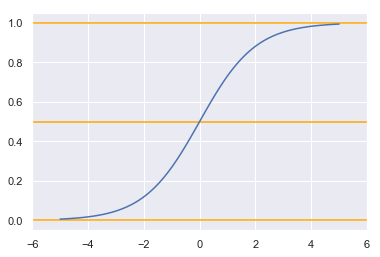

In [20]:
#plot for sigmoid function
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()
from scipy.special import expit
a = np.linspace(-5,5,100)
plt.plot(a,expit(a))
plt.hlines(.5,-6,6, color = 'orange')
plt.hlines(1,-6,6, color = 'orange')
plt.hlines(0,-6,6, color = 'orange')
plt.xlim(-6,6)

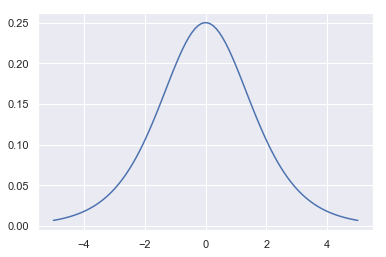

In [21]:
#plot for the derivative of sigmoid function
b = expit(a)
plt.plot(a,b*(1-b))

(-20, 20)

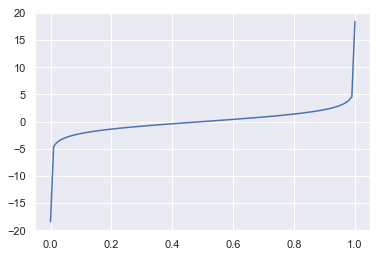

In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

a = np.linspace(0.00000001,.99999999,100)
plt.plot(a, np.log(a/(1-a)))
plt.ylim(-20,20)

#### tanh Curve

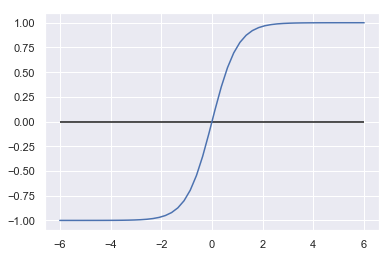

In [23]:
a = np.linspace(-6,6,50)
plt.plot(a, np.tanh(a))
plt.hlines(0,-6,6)

#### RELU Curve

In [24]:
def relu(a):
    if a >= 0:
        return a
    else:
        return 0
    
np_relu = np.vectorize(relu, otypes = [float] )

# Note that np.vectorize determines the type of output based on the first output value. To avoid this, set 
#the parameter 'otypes' as shown above 

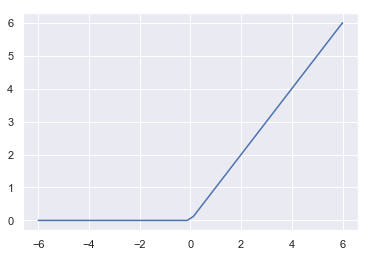

In [25]:
plt.plot(a, np_relu(a))

### Softmax

In [26]:
z = [1,2,3,4,1,2,3]
arr = np.array(z, dtype = float)
softmax = np.exp(arr)/np.sum(np.exp(arr))
softmax, np.sum(softmax)

(array([0.02364054, 0.06426166, 0.1746813 , 0.474833  , 0.02364054,
        0.06426166, 0.1746813 ]), 0.9999999999999999)

#### Important Scipy Functions
```
scipy.special.expit
scipy.linalg.eig
scipy.special.factorial
scipy.stats.binom.stats
scipy.stats.binom.pmf
scipy.stats.shapiro
scipy.stats.norm.pdf
scipy.stats.t.sf
scipy.stats.poisson
```

#### Markov Process

In [27]:
import numpy as np

def markov(p,s,steps):
    for i in range(steps):
        s = np.dot(s,p)
    return s

p = np.array([[.5,.5,0,0,0,0],
              [.4,.1,.5,0,0,0],
              [0,.3,.2,.5,0,0],
              [0,0,0.2,0.3,0.5,0],
              [0,0,0,.1,0.4,0.5],
              [0,0,0,0,0,1]])

s = np.array([1,0,0,0,0,0])
steps = 10

print(markov(p,s,steps))

[0.14174652 0.13991101 0.13621209 0.12999256 0.12142531 0.3307125 ]


#### `scipy.optimize.basinhopping` - For Minimum value of Functions

In [28]:
from scipy.optimize import basinhopping

def f(x):
    return (2*(x+1)**2+2)

def f1(x):
    return 2*np.sin(x[0])**2 + 3*np.cos(x[1])**3

xo = [1] #initial guess for f(x)
x1 = [1,2] #initial guess for f1(x)


basinhopping(f, xo)

                        fun: 2.0
 lowest_optimization_result:       fun: 2.0
 hess_inv: array([[1]])
      jac: array([2.98023224e-08])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 1
     njev: 3
   status: 0
  success: True
        x: array([-1.])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 909
                        nit: 100
                       njev: 303
                          x: array([-1.])

In [29]:
basinhopping(f1, x1)

                        fun: -3.0
 lowest_optimization_result:       fun: -3.0
 hess_inv: array([[ 2.51330708e-01, -1.61382518e-05],
       [-1.61382518e-05,  1.11115576e-01]])
      jac: array([2.98023224e-08, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 32
      nit: 5
     njev: 8
   status: 0
  success: True
        x: array([-3.14159266,  3.14159265])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 3264
                        nit: 100
                       njev: 816
                          x: array([-3.14159266,  3.14159265])